## importing libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data= pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [10]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey', 'Arrival_Time' , 'Dep_Time']:
    change_into_datetime(i)

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or sp

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
train_data['journey_day']= train_data['Date_of_Journey'].dt.day
train_data['journey_month']= train_data['Date_of_Journey'].dt.month

In [14]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-19 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-03-19 05:50:00,2023-03-19 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-03-19 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-03-19 18:05:00,2023-03-19 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-03-19 16:50:00,2023-03-19 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [16]:
def extract_hour(df, col):
    df[col+'_hour']=df[col].dt.hour

In [17]:
def extract_min(df, col):
    df[col+'_min']=df[col].dt.minute

In [18]:
def drop_column(df,col):
    df.drop(col, axis=1, inplace=True)

In [19]:
extract_hour(train_data,'Dep_Time' )
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [20]:
extract_hour(train_data,'Arrival_Time' )
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [21]:
train_data.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [22]:
durations= list(train_data['Duration'])
train_data['Duration']= durations
for i in range(len(durations)):
    if len(durations[i].split(' '))==2:
        pass
    else: 
        if "h" in durations[i]:
            durations[i]= durations[i]+ ' 00m'
        else:
            durations[i]= durations[i]+ ' 00h'

            

In [23]:
train_data['Duration']= durations
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
#now we will split hours and minutes
def hours(x):
    return x.split(" ")[0][0:-1]
    
def minute(x):
    return x.split(" ")[1][0:-1]

In [25]:
train_data['hour']=train_data["Duration"].apply(hours)
train_data['minute']= train_data["Duration"].apply(minute)


In [26]:

drop_column(train_data, "Additional_Info")

In [27]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
hour                 object
minute               object
dtype: object

In [28]:
train_data['hour']= train_data['hour'].astype(int)
train_data['minute']= train_data['minute'].astype(int)

In [29]:
#categorical columns
cat_col= [i for i in train_data.columns if train_data[i].dtypes=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops']

In [30]:
cont_col= [i for i in train_data.columns if train_data[i].dtypes!='O']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'hour',
 'minute']

# Feature encoding

In [31]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Duration,Total_Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 00m,2 stops
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop


In [32]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

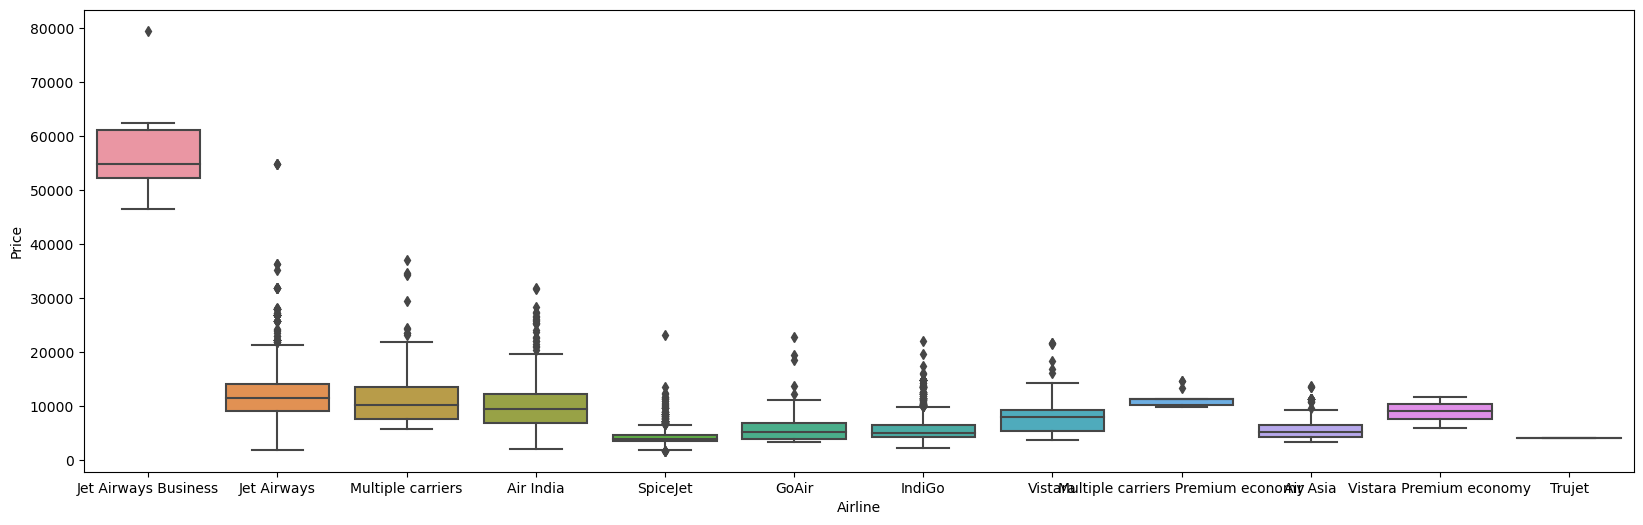

In [33]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Airline', y='Price', data= train_data.sort_values('Price', ascending=False) )

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

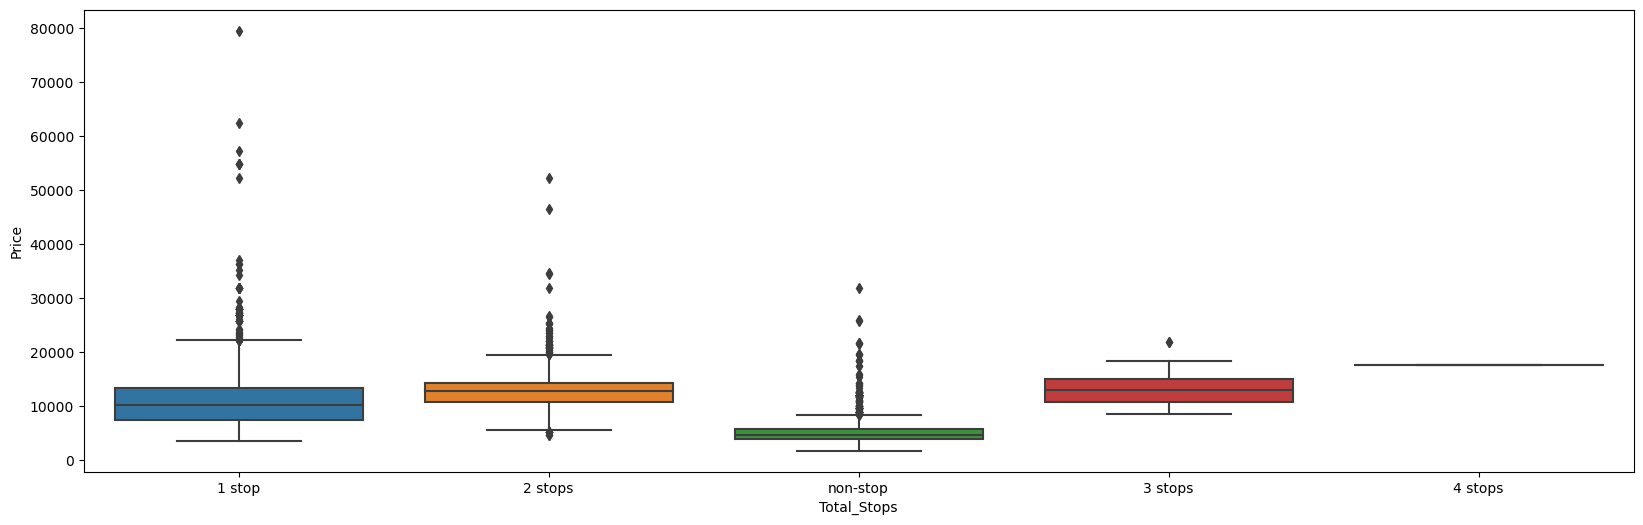

In [34]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Total_Stops', y='Price', data= train_data.sort_values('Price', ascending=False) )
#flight which has 1 stop has higher price and who has 4 is of lower prices

<AxesSubplot:xlabel='Source', ylabel='Price'>

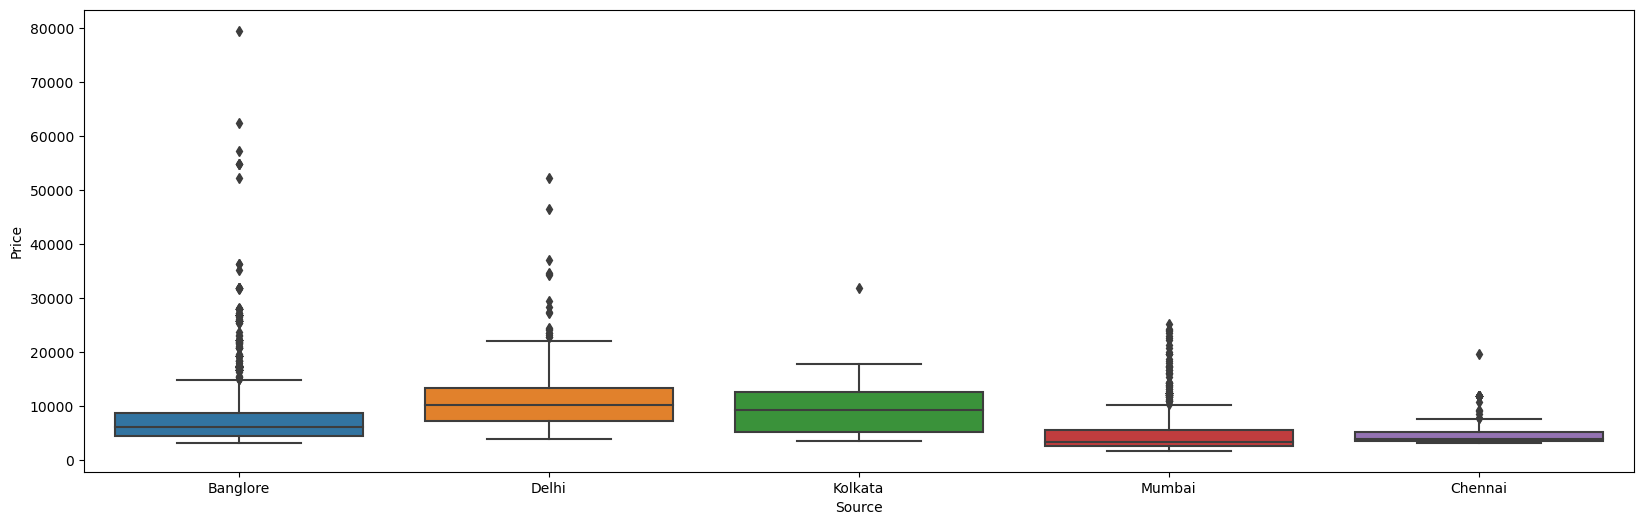

In [35]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Source', y='Price', data= train_data.sort_values('Price', ascending=False) )
#flights are costliest in bangalore

In [36]:
#dummify the coulmns so that we get integer for categorical data
Airline= pd.get_dummies(categorical["Airline"], drop_first=True)
Source= pd.get_dummies(categorical["Source"], drop_first=True)
Destination= pd.get_dummies(categorical["Destination"], drop_first=True)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

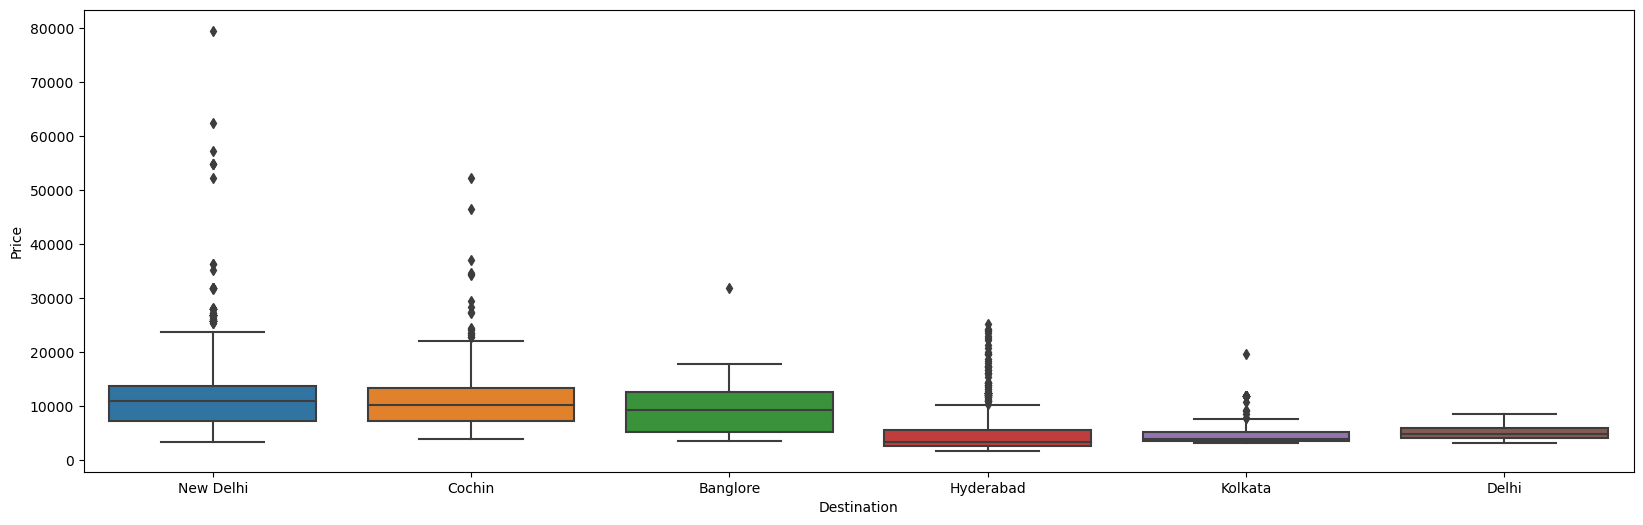

In [37]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Destination', y='Price', data= train_data.sort_values('Price', ascending=False) )

In [38]:
categorical['Route_1']=categorical['Route'].str.split("→").str[0]
categorical['Route_2']=categorical['Route'].str.split("→").str[1]
categorical['Route_3']=categorical['Route'].str.split("→").str[2]
categorical['Route_4']=categorical['Route'].str.split("→").str[3]
categorical['Route_5']=categorical['Route'].str.split("→").str[4]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6456\3655324138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1']=categorical['Route'].str.split("→").str[0]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6456\3655324138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2']=categorical['Route'].str.split("→").str[1]
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6456\3655324138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [39]:
drop_column(categorical, "Route")
categorical.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6456\3459079858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col, axis=1, inplace=True)


,Airline,Source,Destination,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2 stops,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h 00m,2 stops,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,BLR,NAG,DEL,NaN,NaN


In [40]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Route_1            0
Route_2            0
Route_3         3491
Route_4         9116
Route_5        10636
dtype: int64

In [41]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [42]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6456\2107875621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i].fillna('None', inplace=True)


In [43]:
categorical.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    0
Route_1        0
Route_2        0
Route_3        0
Route_4        0
Route_5        0
dtype: int64

In [44]:
for i in categorical.columns:
    print('{} has {} numbers of categories'.format(i, len(categorical[i].value_counts())))

Airline has 12 numbers of categories
Source has 5 numbers of categories
Destination has 6 numbers of categories
Duration has 368 numbers of categories
Total_Stops has 5 numbers of categories
Route_1 has 5 numbers of categories
Route_2 has 45 numbers of categories
Route_3 has 30 numbers of categories
Route_4 has 14 numbers of categories
Route_5 has 6 numbers of categories


In [45]:
# using label encoder for our categories
from sklearn.preprocessing import LabelEncoder

In [46]:
encoder= LabelEncoder()

In [47]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [48]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]= encoder.fit_transform(categorical[i])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6456\963060078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]= encoder.fit_transform(categorical[i])


In [49]:
categorical.head()

,Airline,Source,Destination,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,7h 25m,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,19h 00m,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,0,34,8,13,5


In [50]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [51]:
dict= {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [52]:
categorical['Total_Stops']= categorical['Total_Stops'].map(dict)
categorical.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6456\4039136080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops']= categorical['Total_Stops'].map(dict)


,Airline,Source,Destination,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,7h 25m,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,19h 00m,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,5h 25m,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,0,34,8,13,5


In [53]:
data_train=pd.concat([categorical,Airline,Source, Destination, train_data[cont_col]], axis=1)

In [54]:
data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,hour,minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,0,13,29,13,5,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,2,25,1,3,5,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 00m,2,3,32,4,5,5,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,2,34,3,13,5,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,0,34,8,13,5,...,1,13302,3,1,16,50,21,35,4,45


In [55]:
drop_column(data_train, "Airline")
drop_column(data_train, "Source")
drop_column(data_train, "Destination")



In [56]:
data_train.head()

,Duration,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,hour,minute
0,2h 50m,0,0,13,29,13,5,0,0,1,...,1,3897,24,3,22,20,1,10,2,50
1,7h 25m,2,2,25,1,3,5,1,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,19h 00m,2,3,32,4,5,5,0,0,0,...,0,13882,6,9,9,25,4,25,19,0
3,5h 25m,1,2,34,3,13,5,0,0,1,...,0,6218,5,12,18,5,23,30,5,25
4,4h 45m,1,0,34,8,13,5,0,0,1,...,1,13302,3,1,16,50,21,35,4,45


# Dealing with outliers

In [57]:
def plot(df, col):
    fig, (ax1, ax2)= plt.subplots(2,1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col],ax=ax2)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


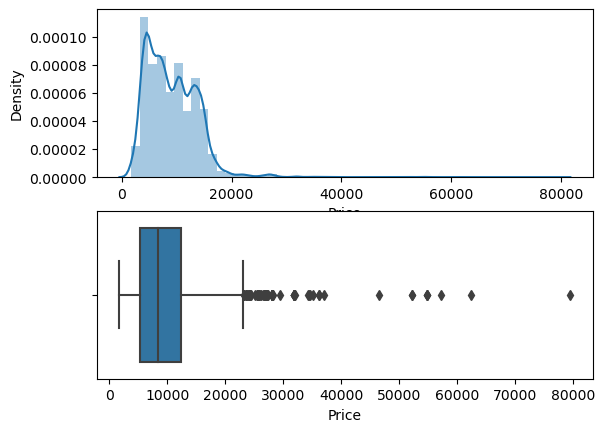

In [58]:
plot(data_train, "Price")

In [59]:
data_train['Price']= np.where(data_train['Price']>=40000, data_train['Price'].median(), data_train['Price'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


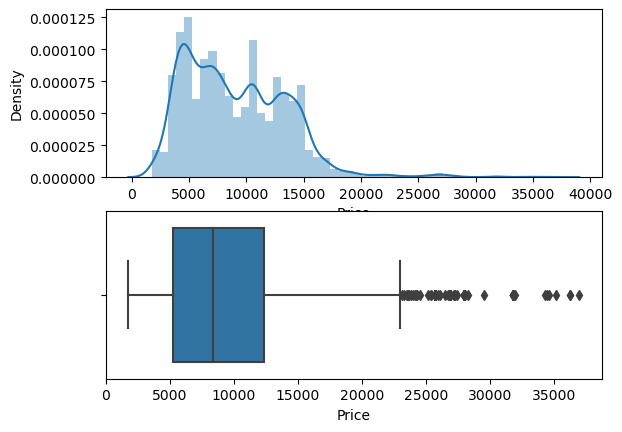

In [60]:
plot(data_train, "Price")

In [61]:
# dependent and independent data
X= data_train.drop('Price', axis=1)


In [62]:
Y= data_train['Price']

In [63]:
from sklearn.feature_selection import mutual_info_classif

In [64]:
drop_column(X, 'Duration')

In [65]:
mutual_info_classif(X,Y)

array([2.14115322, 2.08830493, 2.80147018, 2.27331301, 1.49097341,
       0.76136838, 0.76775421, 0.09138301, 0.66833935, 0.93508693,
       0.005597  , 0.57970465, 0.00788798, 0.32192392, 0.        ,
       0.22392864, 0.        , 0.17061838, 1.55890458, 0.88085611,
       0.28135154, 1.56061323, 0.40896588, 0.29358792, 0.17418715,
       0.37791294, 1.07281605, 0.84626045, 1.45285538, 1.22255491,
       1.87003565, 1.55074233, 1.77969888, 1.07674676])

In [66]:
imp=pd.DataFrame(mutual_info_classif(X,Y), X.columns)
imp

,0
Total_Stops,2.177122
Route_1,2.026117
Route_2,2.768661
Route_3,2.316572
Route_4,1.487118
Route_5,0.710822
Air India,0.784688
GoAir,0.091526
IndiGo,0.669250
Jet Airways,0.929222


In [67]:
imp.columns= ['Importance']
imp.sort_values(by="Importance", ascending=False)

,Importance
Route_2,2.768661
Route_3,2.316572
Total_Stops,2.177122
Route_1,2.026117
Arrival_Time_hour,1.881135
hour,1.790694
Delhi,1.549510
Cochin,1.549176
Arrival_Time_min,1.541553
Route_4,1.487118


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)

In [134]:
from sklearn import metrics
import pickle
def predict(ml_model):
    model= ml_model.fit(X=X_train,y=y_train)
    print('Model trainig score:',model.score(X_train, y_train))
    predictions= model.predict(X_test)
    print('predictions are:', predictions)
    print("\n")
    r2_score=metrics.r2_score(y_test, predictions)
    print("r_squared is:", r2_score)
    #MAE mean absolute error
    #MSE Mean squared error
    print("MAE:", metrics.mean_absolute_error(y_test, predictions))
    print("MSE:", metrics.mean_squared_error(y_test,predictions))
    print("RMSE:", np.sqrt(metrics.mean_absolute_error(y_test, predictions)))
    sns.distplot(y_test-predictions)
    
    

In [135]:
from sklearn.ensemble import RandomForestRegressor

Model trainig score: 0.9533526777336926
predictions are: [ 4470.45383333  3576.72        7018.64       ... 11835.52
 10916.07       10645.5       ]


r_squared is: 0.824807403322176
MAE: 1190.0354105556871
MSE: 3576257.355265247
RMSE: 34.496889867866166


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


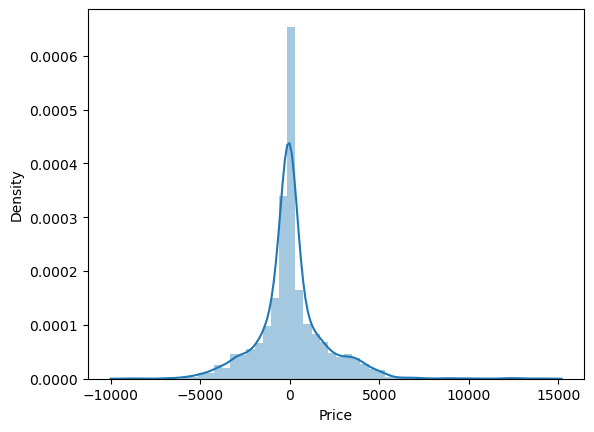

In [136]:
predict(RandomForestRegressor())

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier

Model trainig score: 0.6159461282449221
predictions are: [ 7190.95083838  3941.81245292  9597.29278332 ... 12504.93927639
 11586.0669974   8850.43140569]


r_squared is: 0.6136586693745896
MAE: 1987.193908494319
MSE: 7886497.782968114
RMSE: 44.57795316627177


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


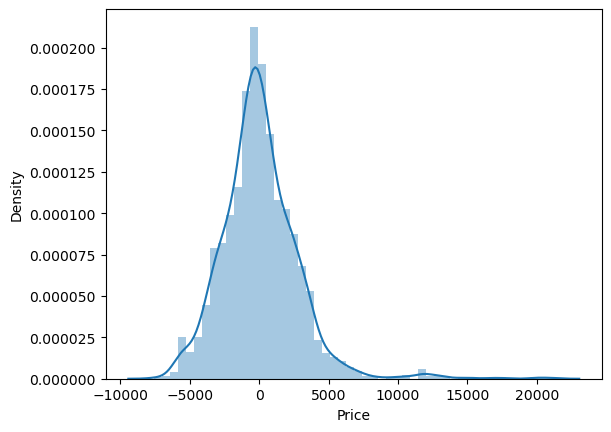

In [139]:
predict(LinearRegression())

Model trainig score: 0.7737386324490807
predictions are: [ 5803.4  3790.6  7105.8 ... 12933.2 10539.6  7160.4]


r_squared is: 0.6629403728893926
MAE: 1753.01534861956
MSE: 6880496.056771174
RMSE: 41.869026124565636


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


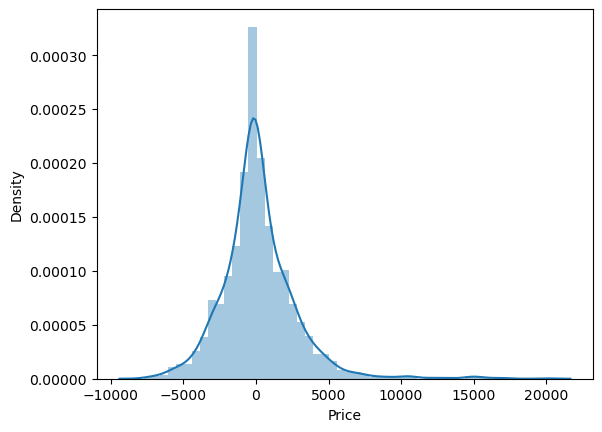

In [141]:
predict(KNeighborsRegressor())